In [115]:
# Load Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
# Load Olympic CSV file

olympic_data = pd.read_csv('Data/athlete_events_edt.csv')
olympic_data.shape

(271116, 15)

In [33]:
# Load NOC CSV file

noc_data = pd.read_csv('Data/noc_regions.csv')
noc_data.shape

(231, 3)

In [34]:
# Preview Olympic dataset

olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [35]:
# Preview NOC dataset
# Notes column has names of countries that are 'formerly known as'
# Therefore, Notes column has alot of NaN

noc_data.head()

,NOC,Region,Notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [36]:
# Inspect Olympic dataset

olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [37]:
olympic_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [38]:
# Inspect missing data

olympic_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Missing Data occurs in the "Age", "Height", "Weight", and "Medal" columns.
- "Medal" column has NaN because not every athlete medaled.

In [39]:
# Change NaN in Medal column to "Did not medal"

#olympic_data['Medal'] = olympic_data['Medal'].fillna(value = 'Did not medal')
#olympic_data.head()

In [40]:
# Merge Olympic dataset with NOC dataset to by 'NOC' Country and rename Region --> Country

olympic_metadata = pd.merge(olympic_data, noc_data, on = 'NOC', how = 'left')
olympic_metadata = olympic_metadata.rename(columns = {'Region':'Country'})
olympic_metadata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [41]:
# Inspect missing data
olympic_metadata.isnull().sum()

ID              0
Name            0
Sex             0
Age          9474
Height      60171
Weight      62875
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      231333
Country         0
Notes      266799
dtype: int64

In [42]:
# Create new dataframe to analyze athlete participation in Olympics.

event = olympic_metadata.groupby(['Year', 'City'])['Season'].value_counts()
olympic_yrs = pd.DataFrame(data={'No. of Athletes': event.values}, index = event.index).reset_index()
olympic_yrs.shape

(51, 4)

In [43]:
olympic_yrs

,Year,City,Season,No. of Athletes
0,1896,Athina,Summer,380
1,1900,Paris,Summer,1936
2,1904,St. Louis,Summer,1301
3,1906,Athina,Summer,1733
4,1908,London,Summer,3101
5,1912,Stockholm,Summer,4040
6,1920,Antwerpen,Summer,4292
7,1924,Chamonix,Winter,460
8,1924,Paris,Summer,5233
9,1928,Amsterdam,Summer,4992


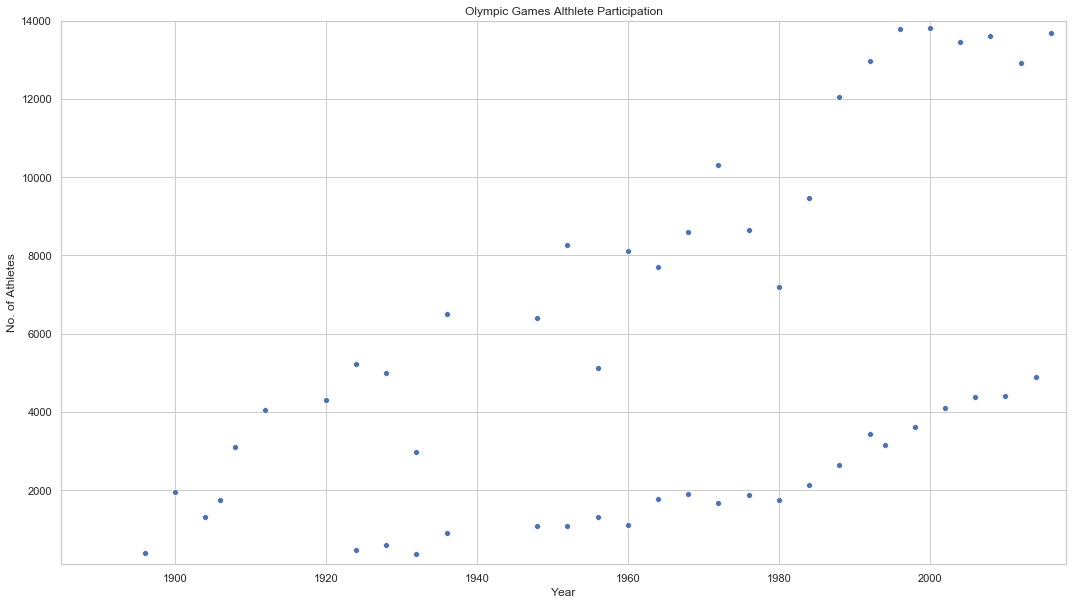

In [44]:
# Create scatterplot to analyze overall athlete participation in Olympic games

# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 10))

# Give chart title, labels, and limits
plt.title('Olympic Games Althlete Participation')
plt.xlabel('Year')
plt.xlim(1885, 2018)
plt.ylabel('Number of Athletes')
plt.ylim(100, 14000)
sns.scatterplot(x = olympic_yrs['Year'], y = olympic_yrs['No. of Athletes'])
plt.savefig('Visualization/Olympic Athlete Participation.png')

In [45]:
# Create a new dataframe for Summer games

summer_games = olympic_yrs.loc[olympic_yrs['Season'] == 'Summer'].reset_index(drop = True)
summer_games.shape

(29, 4)

In [46]:
summer_games

,Year,City,Season,No. of Athletes
0,1896,Athina,Summer,380
1,1900,Paris,Summer,1936
2,1904,St. Louis,Summer,1301
3,1906,Athina,Summer,1733
4,1908,London,Summer,3101
5,1912,Stockholm,Summer,4040
6,1920,Antwerpen,Summer,4292
7,1924,Paris,Summer,5233
8,1928,Amsterdam,Summer,4992
9,1932,Los Angeles,Summer,2969


In [47]:
# Create new dataframe for Winter games

winter_games = olympic_yrs.loc[olympic_yrs['Season'] == 'Winter'].reset_index(drop = True)
winter_games.shape

(22, 4)

In [48]:
winter_games

,Year,City,Season,No. of Athletes
0,1924,Chamonix,Winter,460
1,1928,Sankt Moritz,Winter,582
2,1932,Lake Placid,Winter,352
3,1936,Garmisch-Partenkirchen,Winter,895
4,1948,Sankt Moritz,Winter,1075
5,1952,Oslo,Winter,1088
6,1956,Cortina d'Ampezzo,Winter,1307
7,1960,Squaw Valley,Winter,1116
8,1964,Innsbruck,Winter,1778
9,1968,Grenoble,Winter,1891


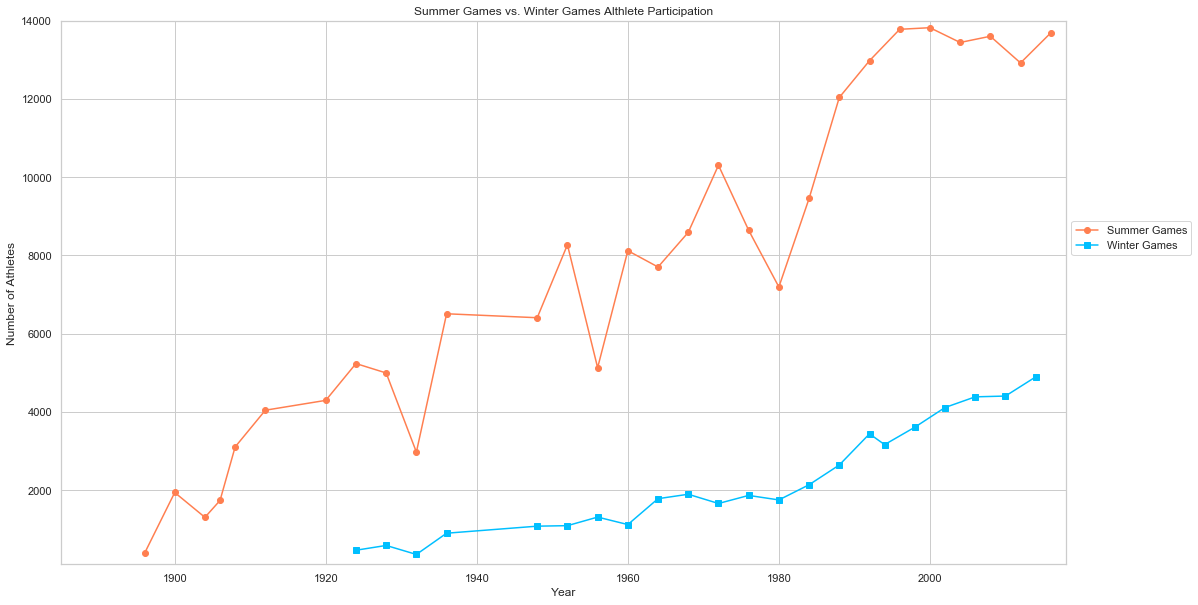

In [49]:
# Create multi-line graph to compare athlete participation in both games

# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 10))

# Give chart title, labels, and limits
plt.title('Summer Games vs. Winter Games Althlete Participation')
plt.xlabel('Year')
plt.xlim(1885, 2018)
plt.ylabel('Number of Athletes')
plt.ylim(100, 14000)

# Create handles for legend and plot multi-line graph
Summer, = plt.plot(summer_games['Year'], summer_games['No. of Athletes'], 
                  marker = 'o', color = 'coral', label = 'Summer Games')
Winter, = plt.plot(winter_games['Year'], winter_games['No. of Athletes'], 
                  marker = 's', color = 'deepskyblue', label = 'Winter Games')
plt.legend(handles = [Summer, Winter], loc = 'center left', bbox_to_anchor = (1, 0.6))
plt.savefig('Visualization/Summer Games vs Winter Games.png')
plt.show()

In [92]:
# Drop athletes that did not medal

medal_df = olympic_metadata.dropna(subset = ['Medal'])
medal._dfshape

(39783, 17)

In [110]:
# Create Dataframe with Country Medal Count

country_medal_ct = medal_df.groupby(['Country'])['Medal'].count().reset_index(name = 'Medal Count') 
country_medal_ct.head()

,Country,Medal Count
0,Afghanistan,2
1,Algeria,17
2,Argentina,274
3,Armenia,16
4,Australia,1349


In [111]:
top_ten_countries = country_medal_ct.sort_values('Medal Count', ascending = False).head(10).reset_index(drop = True)
top_ten_countries

,Country,Medal Count
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


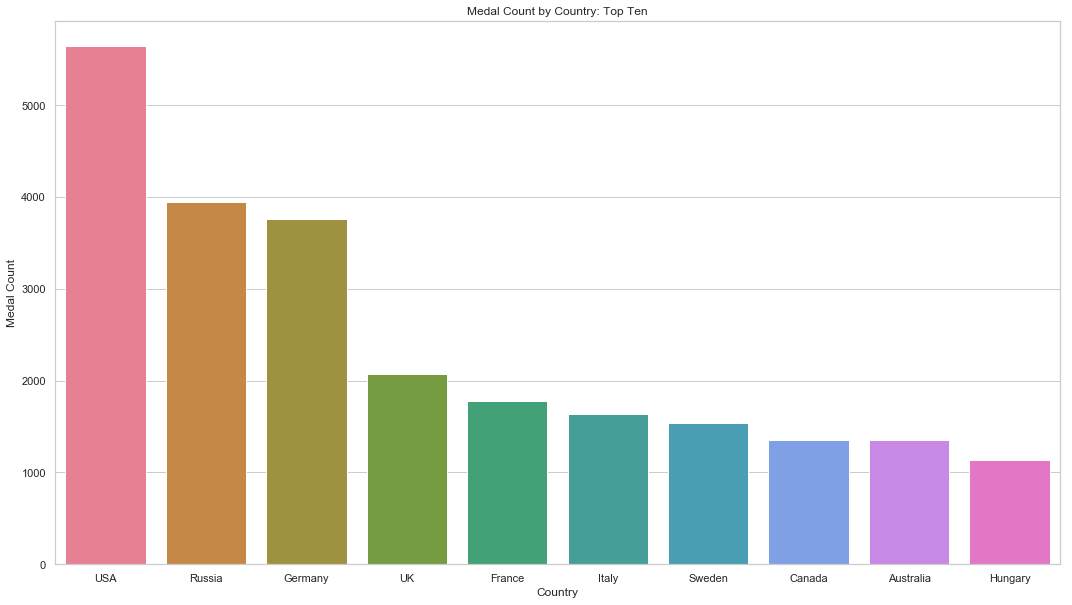

In [119]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 10))

# Give chart title, labels, and limits
plt.title('Medal Count by Country: Top Ten')
plt.xlabel('Country')
plt.ylabel('Number of Medals Won')

# Plot barplot
sns.barplot(x = top_ten_countries['Country'], 
            y = top_ten_countries['Medal Count'], 
            palette = 'husl')

plt.savefig('Visualization/Top Ten Countries.png')

In [104]:
medal_ct = medal.groupby(['Country'])['Medal'].value_counts().reset_index(name = 'Medal Count')
medal_ct.head()

,Country,Medal,Medal Count
0,Afghanistan,Bronze,2
1,Algeria,Bronze,8
2,Algeria,Gold,5
3,Algeria,Silver,4
4,Argentina,Silver,92


In [106]:
gold = medal_ct.loc[medal_ct['Medal'] == 'Gold'].reset_index(drop = True)
top_five_gold = gold.sort_values('Medal Count', ascending = False).head(5).reset_index(drop = True)
top_five_gold

,Country,Medal,Medal Count
0,USA,Gold,2638
1,Russia,Gold,1599
2,Germany,Gold,1301
3,UK,Gold,678
4,Italy,Gold,575


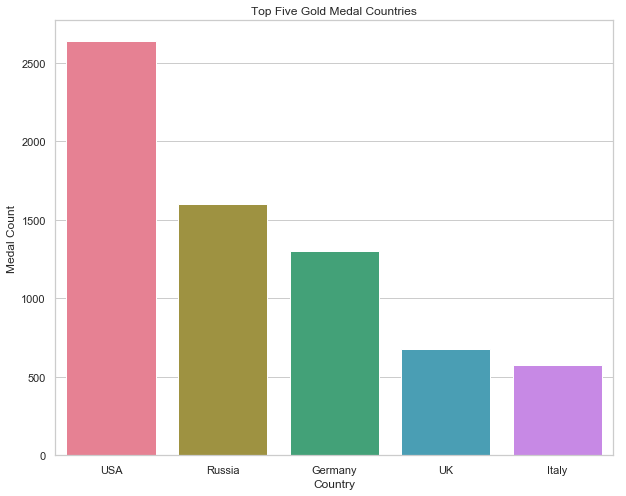

In [122]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))

# Give chart title, labels, and limits
plt.title('Top Five Gold Medal Countries')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals Won')

# Plot barplot
sns.barplot(x = top_five_gold['Country'], 
            y = top_five_gold['Medal Count'], 
            palette = 'husl')

plt.savefig('Visualization/Top Five Gold.png')

In [107]:
silver = medal_ct.loc[medal_ct['Medal'] == 'Silver'].reset_index(drop = True)
top_five_silver = silver.sort_values('Medal Count', ascending = False).head(5).reset_index(drop = True)
top_five_silver

,Country,Medal,Medal Count
0,USA,Silver,1641
1,Germany,Silver,1195
2,Russia,Silver,1170
3,UK,Silver,739
4,France,Silver,610


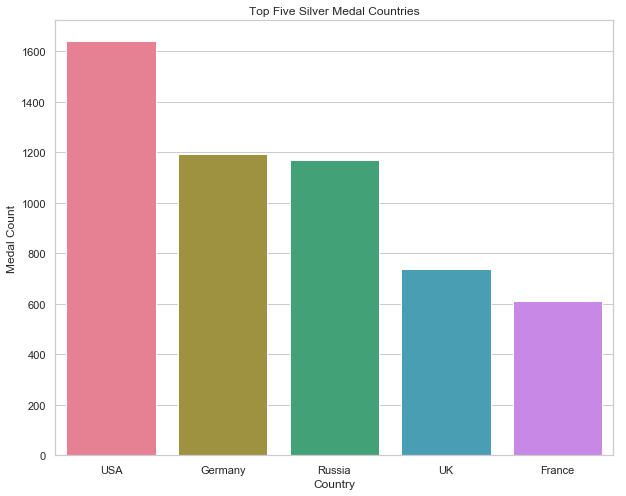

In [123]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))

# Give chart title, labels, and limits
plt.title('Top Five Silver Medal Countries')
plt.xlabel('Country')
plt.ylabel('Number of Silver Medals Won')

# Plot barplot
sns.barplot(x = top_five_silver['Country'], 
            y = top_five_silver['Medal Count'], 
            palette = 'husl')

plt.savefig('Visualization/Top Five Silver.png')

In [109]:
bronze = medal_ct.loc[medal_ct['Medal'] == 'Bronze'].reset_index(drop = True)
top_five_bronze = bronze.sort_values('Medal Count', ascending = False).head(5).reset_index(drop = True)
top_five_bronze

,Country,Medal,Medal Count
0,USA,Bronze,1358
1,Germany,Bronze,1260
2,Russia,Bronze,1178
3,France,Bronze,666
4,UK,Bronze,651


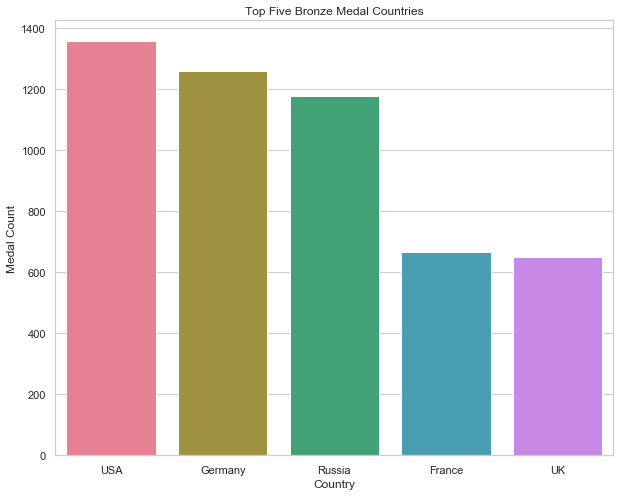

In [126]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))

# Give chart title, labels, and limits
plt.title('Top Five Bronze Medal Countries')
plt.xlabel('Country')
plt.ylabel('Number of Bronze Medals Won')

# Plot barplot
sns.barplot(x = top_five_bronze['Country'], 
            y = top_five_bronze['Medal Count'], 
            palette = 'husl')

plt.savefig('Visualization/Top Five Bronze.png')